# Imports

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate

# Configs

In [46]:
LABELED_PATH = "data/results/labels.parquet"
PREDICTED_XGB_PATH = "data/results/xgb_predictions.parquet"
PREDICTED_RF_PATH = "data/results/rf_predictions.parquet"
PREDICTED_RIDGE_PATH = "data/results/ridge_test_predictions.parquet"
PREDICTED_ARIMA_PATH = "data/results/arima_predict.parquet"
TEST_START_DATE = '2023-04-01'
TEST_START_DATE_BASE_LINE = '2023-03-25'
HIGH_DEMAND_NUMS = 50
MID_DEMAND_NUMS = 100
SAVE_PLOT_PATH = 'data/pngs/'
warnings.filterwarnings('ignore')

In [47]:
report_dict = {
    'high_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        }
        
    },
    'mid_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        }
        
    },    
    'low_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        }
        
    },
    'all_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        }
    },
    
    
}

In [48]:
predictions_dict = {
    'baseline_last_day':None,
    'baseline_last_week':None,
    'model_rf':None,
    'model_xgboost':None,
    'model_ridge':None
}

In [49]:
sorted_locations_dict={
    'baseline_last_week':None,
    'model_rf':None,
    'model_xgboost':None,
    'model_ridge':None
}

In [50]:
predictions_mean_error_dict={
    
    'baseline_last_week':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_rf':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_xgboost':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_ridge':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
}

# Load Data

## Load labeled data

In [51]:
labeled_df = pd.read_parquet(LABELED_PATH)
print(labeled_df.shape)
labeled_df.head()

(31560, 17)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-01-01       36.74    40.0        276.00              2.0   
1         1 2023-01-02       45.33    31.0        279.50              1.0   
2         1 2023-01-03        0.54    27.0        351.00              1.0   
3         1 2023-01-04        2.60     7.0        204.69              2.0   
4         1 2023-01-05       68.41    15.0        213.00              2.0   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0      3441.62    0.0         5.0                   0.0      393.43      0   
1      2699.66    0.0         5.0                   0.0      363.76      0   
2      2233.76    0.0         5.0                   0.0      296.50      0   
3       751.73    0.0         5.0                   0.0      194.64      0   
4      1340.66    2.5         5.0                   0.0      200.13      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  
0         0    1          0       0              0  
1         0    1          0       0              0  
2         0    1          0       0              0  
3         0    1          0       0              0  
4         0    1          0       0              0

In [52]:
test_df = labeled_df.loc[labeled_df['Date']>=TEST_START_DATE]
test_df = test_df.reset_index(drop = True)
print(test_df.shape)
test_df.head()

(7890, 17)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-01        0.02    13.0        194.10              1.0   
1         1 2023-04-02        3.82    17.0        156.55              1.0   
2         1 2023-04-03       18.13     9.0        154.00              1.0   
3         1 2023-04-04        0.01    12.0        145.00              2.0   
4         1 2023-04-05        0.60    18.0        157.20              1.5   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0      1015.55    0.0         5.0                   0.0      140.75      0   
1      1554.88    0.0         5.0                   0.0      305.36      0   
2       606.50    0.0         5.0                   0.0       65.45      0   
3      1240.60    0.0         5.0                   0.0      167.64      0   
4      1570.26    2.5         5.0                   0.0      333.60      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  
0         0    1          0       0              0  
1         0    1          0       0              0  
2         0    1          0       0              0  
3         0    1          0       0              0  
4         0    1          0       0              0

## Load Predicted Data

In [53]:
predictions_dict['model_xgboost'] = pd.read_parquet(PREDICTED_XGB_PATH)
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(7890, 3)


Location       Date  Predicted_demand
0         1 2023-04-01         16.420139
1         1 2023-04-02         16.018064
2         1 2023-04-03         12.164080
3         1 2023-04-04          9.627566
4         1 2023-04-05         11.749611

In [54]:
predictions_dict['model_ridge'] = pd.read_parquet(PREDICTED_RIDGE_PATH)
print(predictions_dict['model_ridge'].shape)
predictions_dict['model_ridge'].head()

(7860, 3)


Location       Date  Predicted_demand
0         1 2023-04-01         18.718806
1         1 2023-04-02         20.378561
2         1 2023-04-03         10.842180
3         1 2023-04-04         10.880406
4         1 2023-04-05         10.410875

In [55]:
predictions_dict['model_rf'] = pd.read_parquet(PREDICTED_RF_PATH)
print(predictions_dict['model_rf'].shape)
predictions_dict['model_rf'].head()

(7890, 3)


Location       Date  Predicted_demand
0         1 2023-04-01         16.569569
1         1 2023-04-02         15.475264
2         1 2023-04-03         11.283756
3         1 2023-04-04         10.623735
4         1 2023-04-05         12.414931

### BaseLine Models

In [56]:
def baseline_predict(dataset, shift_val):
    predicted_demand = dataset.groupby(['Location'])['Demand'].shift(shift_val)
    predicted_data = pd.DataFrame(dataset[['Location', 'Date']])
    predicted_data['Predicted_demand'] = predicted_demand
    return predicted_data

In [57]:
baseline_test_df = labeled_df.loc[labeled_df['Date']>=TEST_START_DATE_BASE_LINE]
baseline_test_df = baseline_test_df.reset_index(drop = True)
print(baseline_test_df.shape)
baseline_test_df.head()

(9731, 17)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-03-25        0.25    15.0        224.40              1.0   
1         1 2023-03-26       32.71    14.0        254.10              2.0   
2         1 2023-03-27        0.00     3.0        145.80              2.0   
3         1 2023-03-28       17.25    14.0        276.25              1.0   
4         1 2023-03-29       17.91     7.0        155.75              1.0   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0      1481.05    0.0         5.0                   0.0      225.11      0   
1      1063.30    0.0         5.0                   0.0      234.80      0   
2       212.00    0.0         5.0                   0.0       40.90      0   
3      1223.00    0.0         5.0                   0.0      248.70      0   
4       805.65    0.0         5.0                   0.0       92.03      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  
0         0    1          0       0              0  
1         0    1          0       0              0  
2         0    1          0       0              0  
3         0    1          0       0              0  
4         0    1          0       0              0

In [58]:
predictions_dict['baseline_last_week'] = baseline_predict(baseline_test_df, 7)
predictions_dict['baseline_last_week'] = predictions_dict['baseline_last_week'].dropna()
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(7897, 3)


Location       Date  Predicted_demand
7          1 2023-04-01              15.0
8          1 2023-04-02              14.0
9          1 2023-04-03               3.0
10         1 2023-04-04              14.0
11         1 2023-04-05               7.0

### Join Predictions and Actual

In [59]:
def join_actual_predict(actual_df, predicted_df):
    actual_predicted_df = actual_df.merge(predicted_df, how='left', on=['Location', 'Date'])
    actual_predicted_df['day_of_week'] = actual_predicted_df['Date'].dt.dayofweek
    return actual_predicted_df

In [60]:
predictions_dict['baseline_last_week'] = join_actual_predict(test_df,predictions_dict['baseline_last_week'])
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(7950, 19)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-01        0.02    13.0        194.10              1.0   
1         1 2023-04-02        3.82    17.0        156.55              1.0   
2         1 2023-04-03       18.13     9.0        154.00              1.0   
3         1 2023-04-04        0.01    12.0        145.00              2.0   
4         1 2023-04-05        0.60    18.0        157.20              1.5   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0      1015.55    0.0         5.0                   0.0      140.75      0   
1      1554.88    0.0         5.0                   0.0      305.36      0   
2       606.50    0.0         5.0                   0.0       65.45      0   
3      1240.60    0.0         5.0                   0.0      167.64      0   
4      1570.26    2.5         5.0                   0.0      333.60      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  Predicted_demand  \
0         0    1          0       0              0              15.0   
1         0    1          0       0              0              14.0   
2         0    1          0       0              0               3.0   
3         0    1          0       0              0              14.0   
4         0    1          0       0              0               7.0   

   day_of_week  
0            5  
1            6  
2            0  
3            1  
4            2

In [61]:
predictions_dict['model_ridge'] = join_actual_predict(test_df,predictions_dict['model_ridge'])
print(predictions_dict['model_ridge'].shape)
predictions_dict['model_ridge'].head()

(7890, 19)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-01        0.02    13.0        194.10              1.0   
1         1 2023-04-02        3.82    17.0        156.55              1.0   
2         1 2023-04-03       18.13     9.0        154.00              1.0   
3         1 2023-04-04        0.01    12.0        145.00              2.0   
4         1 2023-04-05        0.60    18.0        157.20              1.5   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0      1015.55    0.0         5.0                   0.0      140.75      0   
1      1554.88    0.0         5.0                   0.0      305.36      0   
2       606.50    0.0         5.0                   0.0       65.45      0   
3      1240.60    0.0         5.0                   0.0      167.64      0   
4      1570.26    2.5         5.0                   0.0      333.60      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  Predicted_demand  \
0         0    1          0       0              0         18.718806   
1         0    1          0       0              0         20.378561   
2         0    1          0       0              0         10.842180   
3         0    1          0       0              0         10.880406   
4         0    1          0       0              0         10.410875   

   day_of_week  
0            5  
1            6  
2            0  
3            1  
4            2

In [62]:
predictions_dict['model_xgboost'] = join_actual_predict(test_df,predictions_dict['model_xgboost'])
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(7950, 19)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-01        0.02    13.0        194.10              1.0   
1         1 2023-04-02        3.82    17.0        156.55              1.0   
2         1 2023-04-03       18.13     9.0        154.00              1.0   
3         1 2023-04-04        0.01    12.0        145.00              2.0   
4         1 2023-04-05        0.60    18.0        157.20              1.5   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0      1015.55    0.0         5.0                   0.0      140.75      0   
1      1554.88    0.0         5.0                   0.0      305.36      0   
2       606.50    0.0         5.0                   0.0       65.45      0   
3      1240.60    0.0         5.0                   0.0      167.64      0   
4      1570.26    2.5         5.0                   0.0      333.60      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  Predicted_demand  \
0         0    1          0       0              0         16.420139   
1         0    1          0       0              0         16.018064   
2         0    1          0       0              0         12.164080   
3         0    1          0       0              0          9.627566   
4         0    1          0       0              0         11.749611   

   day_of_week  
0            5  
1            6  
2            0  
3            1  
4            2

In [63]:
predictions_dict['model_rf'] = join_actual_predict(test_df,predictions_dict['model_rf'])
print(predictions_dict['model_rf'].shape)
predictions_dict['model_rf'].head()

(7950, 19)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-01        0.02    13.0        194.10              1.0   
1         1 2023-04-02        3.82    17.0        156.55              1.0   
2         1 2023-04-03       18.13     9.0        154.00              1.0   
3         1 2023-04-04        0.01    12.0        145.00              2.0   
4         1 2023-04-05        0.60    18.0        157.20              1.5   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0      1015.55    0.0         5.0                   0.0      140.75      0   
1      1554.88    0.0         5.0                   0.0      305.36      0   
2       606.50    0.0         5.0                   0.0       65.45      0   
3      1240.60    0.0         5.0                   0.0      167.64      0   
4      1570.26    2.5         5.0                   0.0      333.60      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  Predicted_demand  \
0         0    1          0       0              0         16.569569   
1         0    1          0       0              0         15.475264   
2         0    1          0       0              0         11.283756   
3         0    1          0       0              0         10.623735   
4         0    1          0       0              0         12.414931   

   day_of_week  
0            5  
1            6  
2            0  
3            1  
4            2

### Sort Locations by Demand

In [64]:
def sort_locations_on_demand(predictions_dict,sorted_locations_dict):
    for label,predictions_df in predictions_dict.items():
        if (predictions_df is not None):
            sorted_index = predictions_df.groupby('Location')['Demand'].aggregate(['sum']).sort_values('sum', ascending=False)
            sorted_index = sorted_index.reset_index()
            sorted_locations_dict[label] = sorted_index

In [65]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['model_xgboost'].shape)
sorted_locations_dict['model_xgboost'].head()

(262, 2)


Location       sum
0       132  173356.0
1       237  153779.0
2       161  149098.0
3       236  138316.0
4       142  113448.0

In [66]:
predictions_dict['model_xgboost'].head()

Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-01        0.02    13.0        194.10              1.0   
1         1 2023-04-02        3.82    17.0        156.55              1.0   
2         1 2023-04-03       18.13     9.0        154.00              1.0   
3         1 2023-04-04        0.01    12.0        145.00              2.0   
4         1 2023-04-05        0.60    18.0        157.20              1.5   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0      1015.55    0.0         5.0                   0.0      140.75      0   
1      1554.88    0.0         5.0                   0.0      305.36      0   
2       606.50    0.0         5.0                   0.0       65.45      0   
3      1240.60    0.0         5.0                   0.0      167.64      0   
4      1570.26    2.5         5.0                   0.0      333.60      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  Predicted_demand  \
0         0    1          0       0              0         16.420139   
1         0    1          0       0              0         16.018064   
2         0    1          0       0              0         12.164080   
3         0    1          0       0              0          9.627566   
4         0    1          0       0              0         11.749611   

   day_of_week  
0            5  
1            6  
2            0  
3            1  
4            2

In [67]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['baseline_last_week'].shape)
sorted_locations_dict['baseline_last_week'].head()

(262, 2)


Location       sum
0       132  173356.0
1       237  153779.0
2       161  149098.0
3       236  138316.0
4       142  113448.0

# Mean error Calculation

### Error Columns

In [68]:
def calculate_error(actual_predicted_dict: dict):
    for label,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            actual_predicted_df['error'] = np.abs(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_predicted_df['squared_error'] = np.square(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_Demand_df = np.where(actual_predicted_df['Demand']==0, 1, actual_predicted_df['Demand'])
            actual_predicted_df['percentage_error'] = (
                actual_predicted_df['error']/actual_Demand_df
                )*100
            

In [69]:
calculate_error(predictions_dict)


In [70]:
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()


(7950, 22)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-01        0.02    13.0        194.10              1.0   
1         1 2023-04-02        3.82    17.0        156.55              1.0   
2         1 2023-04-03       18.13     9.0        154.00              1.0   
3         1 2023-04-04        0.01    12.0        145.00              2.0   
4         1 2023-04-05        0.60    18.0        157.20              1.5   

   fare_amount  extra  RatecodeID  congestion_surcharge  ...  Brooklyn  EWR  \
0      1015.55    0.0         5.0                   0.0  ...         0    1   
1      1554.88    0.0         5.0                   0.0  ...         0    1   
2       606.50    0.0         5.0                   0.0  ...         0    1   
3      1240.60    0.0         5.0                   0.0  ...         0    1   
4      1570.26    2.5         5.0                   0.0  ...         0    1   

   Manhattan  Queens  Staten Island  Predicted_demand  day_of_week  error  \
0          0       0              0              15.0            5    2.0   
1          0       0              0              14.0            6    3.0   
2          0       0              0               3.0            0    6.0   
3          0       0              0              14.0            1    2.0   
4          0       0              0               7.0            2   11.0   

   squared_error  percentage_error  
0            4.0         15.384615  
1            9.0         17.647059  
2           36.0         66.666667  
3            4.0         16.666667  
4          121.0         61.111111  

[5 rows x 22 columns]

In [71]:
predictions_dict['baseline_last_week'].tail()

Location       Date  trip_dists  Demand  total_amount  passenger_count  \
7945       265 2023-04-26      233.45    78.0         520.0              1.0   
7946       265 2023-04-27      114.72    44.0         432.6              1.0   
7947       265 2023-04-28      215.37    55.0         606.0              1.0   
7948       265 2023-04-29       65.48    45.0         346.0              1.0   
7949       265 2023-04-30       91.62    69.0         475.0              1.0   

      fare_amount  extra  RatecodeID  congestion_surcharge  ...  Brooklyn  \
7945      5976.94    2.5        99.0                   0.0  ...         0   
7946      5028.68    1.0        99.0                   0.0  ...         0   
7947      6248.31    2.5        99.0                   0.0  ...         0   
7948      3740.92    1.0         5.0                   0.0  ...         0   
7949      8171.80    5.0        99.0                   0.0  ...         0   

      EWR  Manhattan  Queens  Staten Island  Predicted_demand  day_of_week  \
7945    0          0       0              0              42.0            2   
7946    0          0       0              0              63.0            3   
7947    0          0       0              0              53.0            4   
7948    0          0       0              0              46.0            5   
7949    0          0       0              0              77.0            6   

      error  squared_error  percentage_error  
7945   36.0         1296.0         46.153846  
7946   19.0          361.0         43.181818  
7947    2.0            4.0          3.636364  
7948    1.0            1.0          2.222222  
7949    8.0           64.0         11.594203  

[5 rows x 22 columns]

In [72]:
print(predictions_dict['model_ridge'].shape)
predictions_dict['model_ridge'].head()

(7890, 22)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-01        0.02    13.0        194.10              1.0   
1         1 2023-04-02        3.82    17.0        156.55              1.0   
2         1 2023-04-03       18.13     9.0        154.00              1.0   
3         1 2023-04-04        0.01    12.0        145.00              2.0   
4         1 2023-04-05        0.60    18.0        157.20              1.5   

   fare_amount  extra  RatecodeID  congestion_surcharge  ...  Brooklyn  EWR  \
0      1015.55    0.0         5.0                   0.0  ...         0    1   
1      1554.88    0.0         5.0                   0.0  ...         0    1   
2       606.50    0.0         5.0                   0.0  ...         0    1   
3      1240.60    0.0         5.0                   0.0  ...         0    1   
4      1570.26    2.5         5.0                   0.0  ...         0    1   

   Manhattan  Queens  Staten Island  Predicted_demand  day_of_week     error  \
0          0       0              0         18.718806            5  5.718806   
1          0       0              0         20.378561            6  3.378561   
2          0       0              0         10.842180            0  1.842180   
3          0       0              0         10.880406            1  1.119594   
4          0       0              0         10.410875            2  7.589125   

   squared_error  percentage_error  
0      32.704743         43.990816  
1      11.414673         19.873887  
2       3.393629         20.468671  
3       1.253490          9.329947  
4      57.594816         42.161805  

[5 rows x 22 columns]

### Aggregate Error Columns

In [73]:
def calculate_mean_error(actual_predicted_dict: dict, predictions_mean_dict: dict):
    per_columns=['Location', 'Date', 'day_of_week']
    for model,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            sorted_index = sorted_locations_dict[model]['Location']
            high_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[:HIGH_DEMAND_NUMS])]
            mid_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS])]
            low_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:])]
            for per in per_columns:
                high_demand_error_df = high_demand_actual_predicted_df[[per,'Demand','error','squared_error', 'percentage_error',]] 
                mid_demand_error_df = mid_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                low_demand_error_df = low_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                all_error_df = actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']]
                
                high_demand_mean_df = (
                    high_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean'))) 
                mid_demand_mean_df = (
                    mid_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                low_demand_mean_df = (
                    low_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                all_mean_df = (
                    all_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                    mae=('error','mean'),
                                                    mse=('squared_error','mean'),
                                                    demand_mean=('Demand','mean'))) 
                
                high_demand_mean_df['mape'] = np.where(high_demand_mean_df['mape']>100, 100, high_demand_mean_df['mape'])
                mid_demand_mean_df['mape'] = np.where(mid_demand_mean_df['mape']>100, 100, mid_demand_mean_df['mape'])
                low_demand_mean_df['mape'] = np.where(low_demand_mean_df['mape']>100, 100, low_demand_mean_df['mape'])
                all_mean_df['mape'] = np.where(all_mean_df['mape']>100, 100, all_mean_df['mape'])
                if per == 'Location':
                    high_demand_mean_df = high_demand_mean_df.reindex(sorted_index[:HIGH_DEMAND_NUMS])
                    mid_demand_mean_df = mid_demand_mean_df.reindex(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS])
                    low_demand_mean_df = low_demand_mean_df.reindex(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:])
                    all_mean_df = all_mean_df.reindex(sorted_index)
                
                predictions_mean_dict[model][per]['high_demand_loc'] = high_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['mid_demand_loc'] = mid_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['low_demand_loc'] = low_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['all_loc'] = all_mean_df.reset_index()
                
    

In [74]:
calculate_mean_error(predictions_dict, predictions_mean_error_dict)

In [75]:
print(predictions_mean_error_dict['baseline_last_week']['Date']['mid_demand_loc'].shape)
predictions_mean_error_dict['baseline_last_week']['Date']['mid_demand_loc'].tail()

(30, 5)


Date       mape        mae         mse  demand_mean
25 2023-04-26  43.820738   6.349515  103.902913    32.660194
26 2023-04-27  50.211626   8.271845  165.320388    35.611650
27 2023-04-28  41.674158   7.427184  145.252427    37.067961
28 2023-04-29  72.972882  12.747573  512.320388    34.174757
29 2023-04-30  65.104232   7.961165  178.077670    31.087379

In [76]:
print(predictions_mean_error_dict['model_xgboost']['Location']['mid_demand_loc'].shape)
predictions_mean_error_dict['model_xgboost']['Location']['mid_demand_loc'].tail()

(100, 5)


Location       mape       mae       mse  demand_mean
95       203  68.059443  1.836769  4.785242     5.100000
96        83  71.018467  2.451637  8.686377     5.100000
97       198  51.409275  2.186498  7.042497     5.066667
98       155  59.647230  1.944700  5.197988     5.033333
99        55  77.217457  2.181353  6.946727     4.966667

In [77]:
print(predictions_mean_error_dict['model_ridge']['Location']['mid_demand_loc'].shape)
predictions_mean_error_dict['model_ridge']['Location']['mid_demand_loc'].tail()

(100, 5)


Location       mape       mae        mse  demand_mean
95        83  78.400409  2.728326  11.980285     5.100000
96       203  66.997160  1.918891   5.582718     5.100000
97       198  59.166414  2.423088   8.241466     5.066667
98       155  53.432409  1.892994   5.096487     5.033333
99        55  76.030676  2.181349   7.058279     4.966667

### Plot Mape for Models Predicted Demands

In [78]:
def plot_mape(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mape',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAPE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAPE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAPE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAPE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'MAPE_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


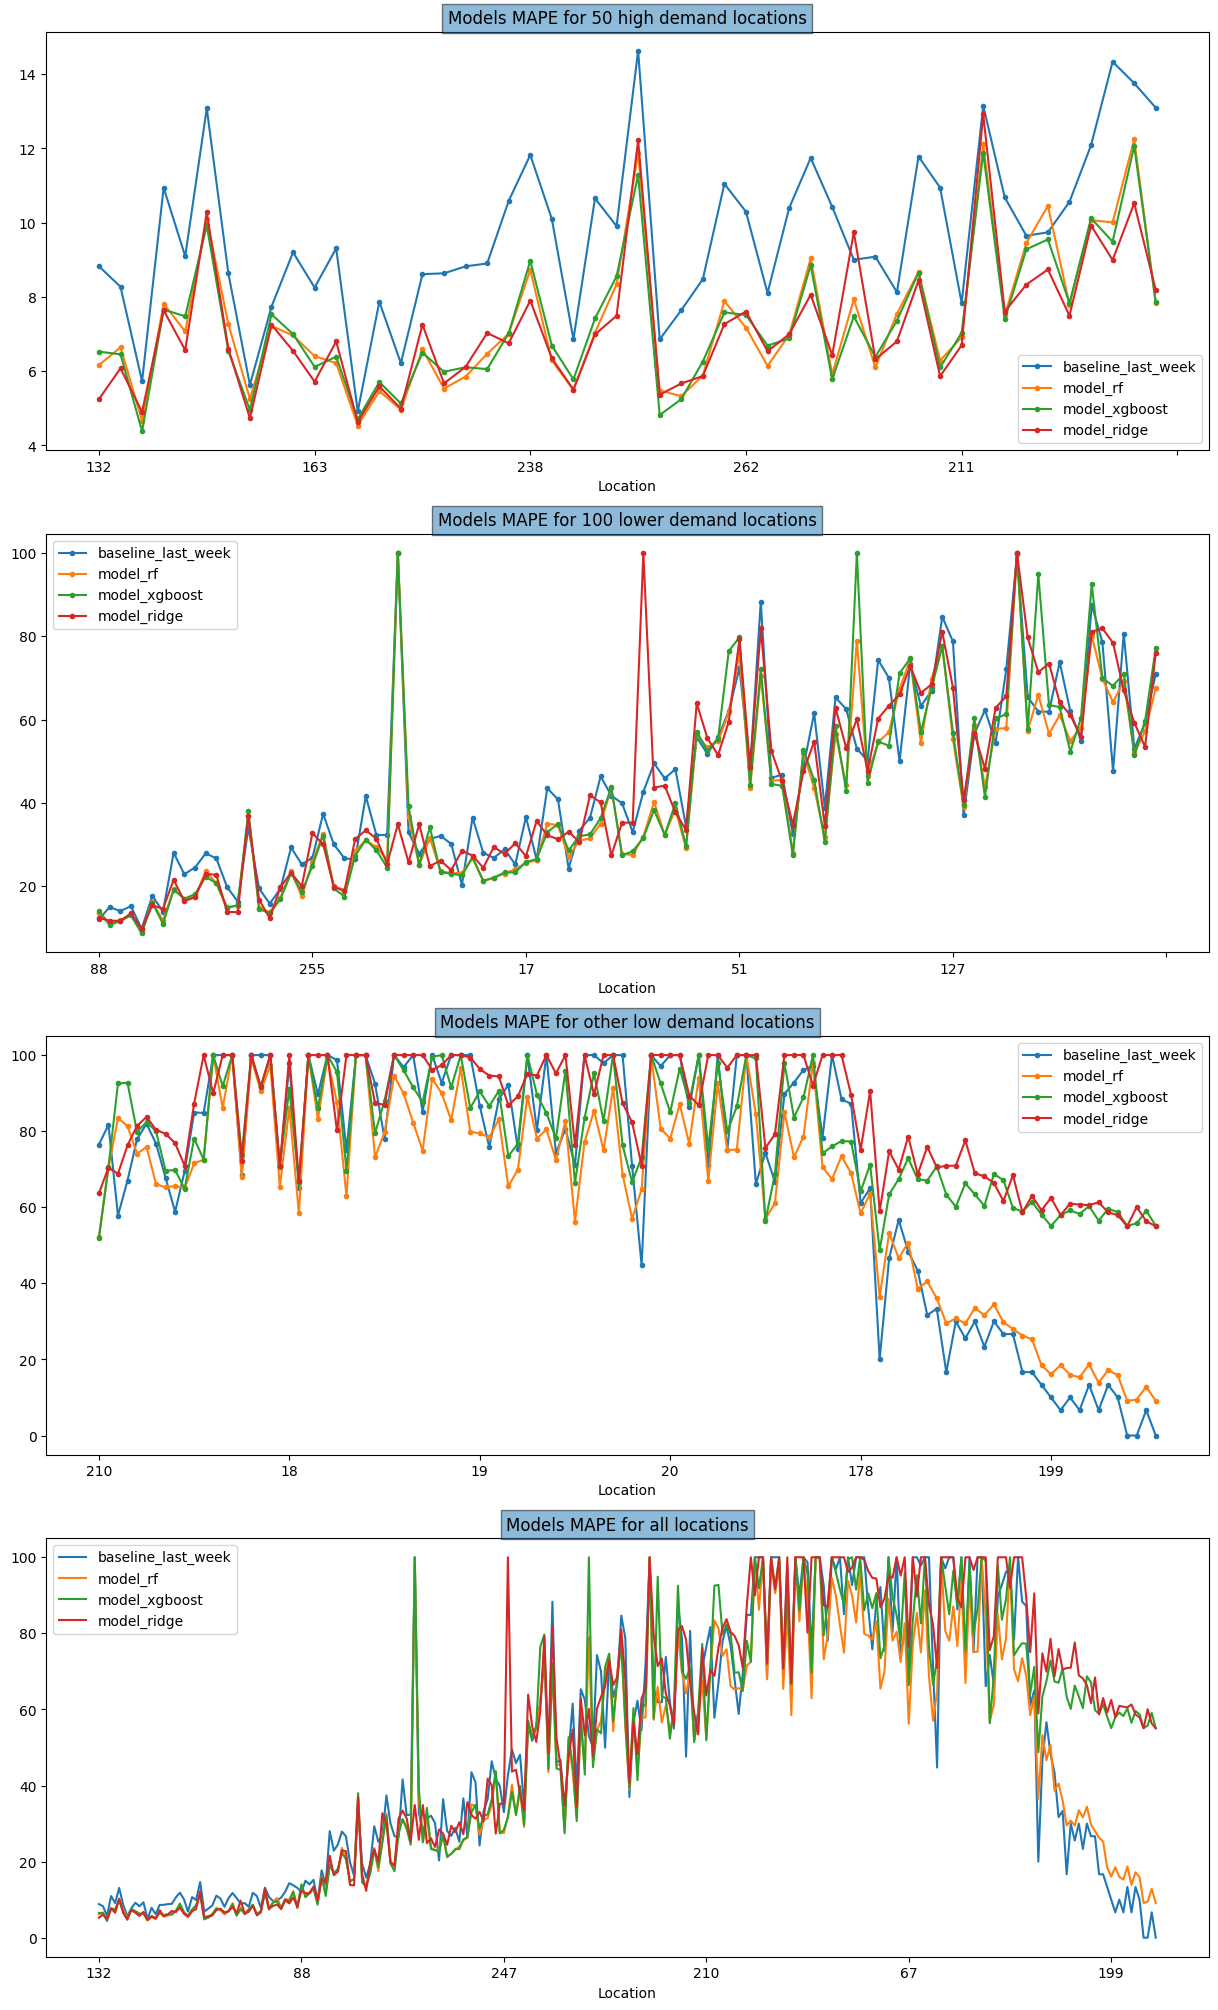

In [79]:
plot_mape(predictions_mean_error_dict, 'Location')

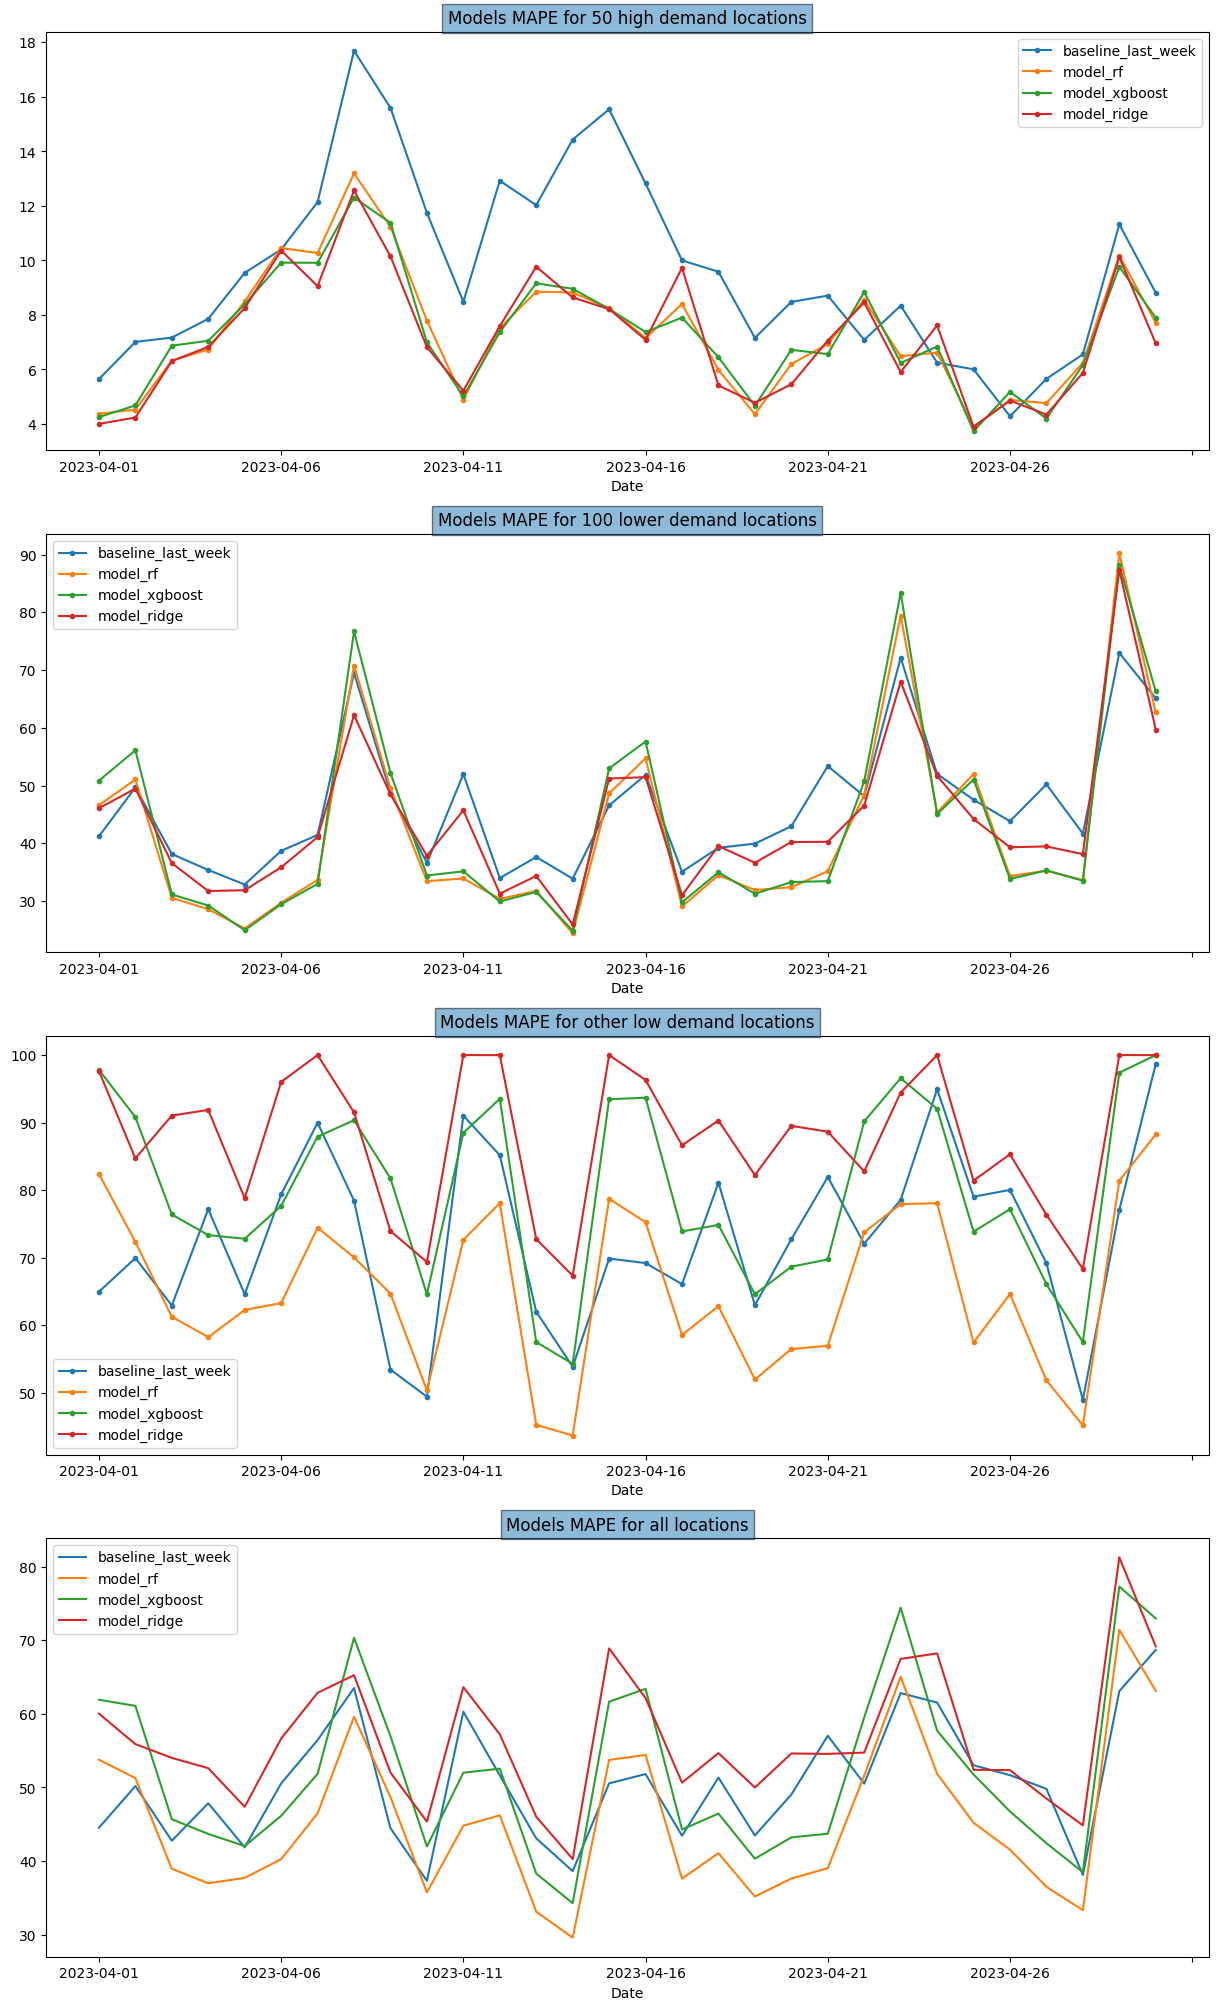

In [80]:
plot_mape(predictions_mean_error_dict, 'Date')

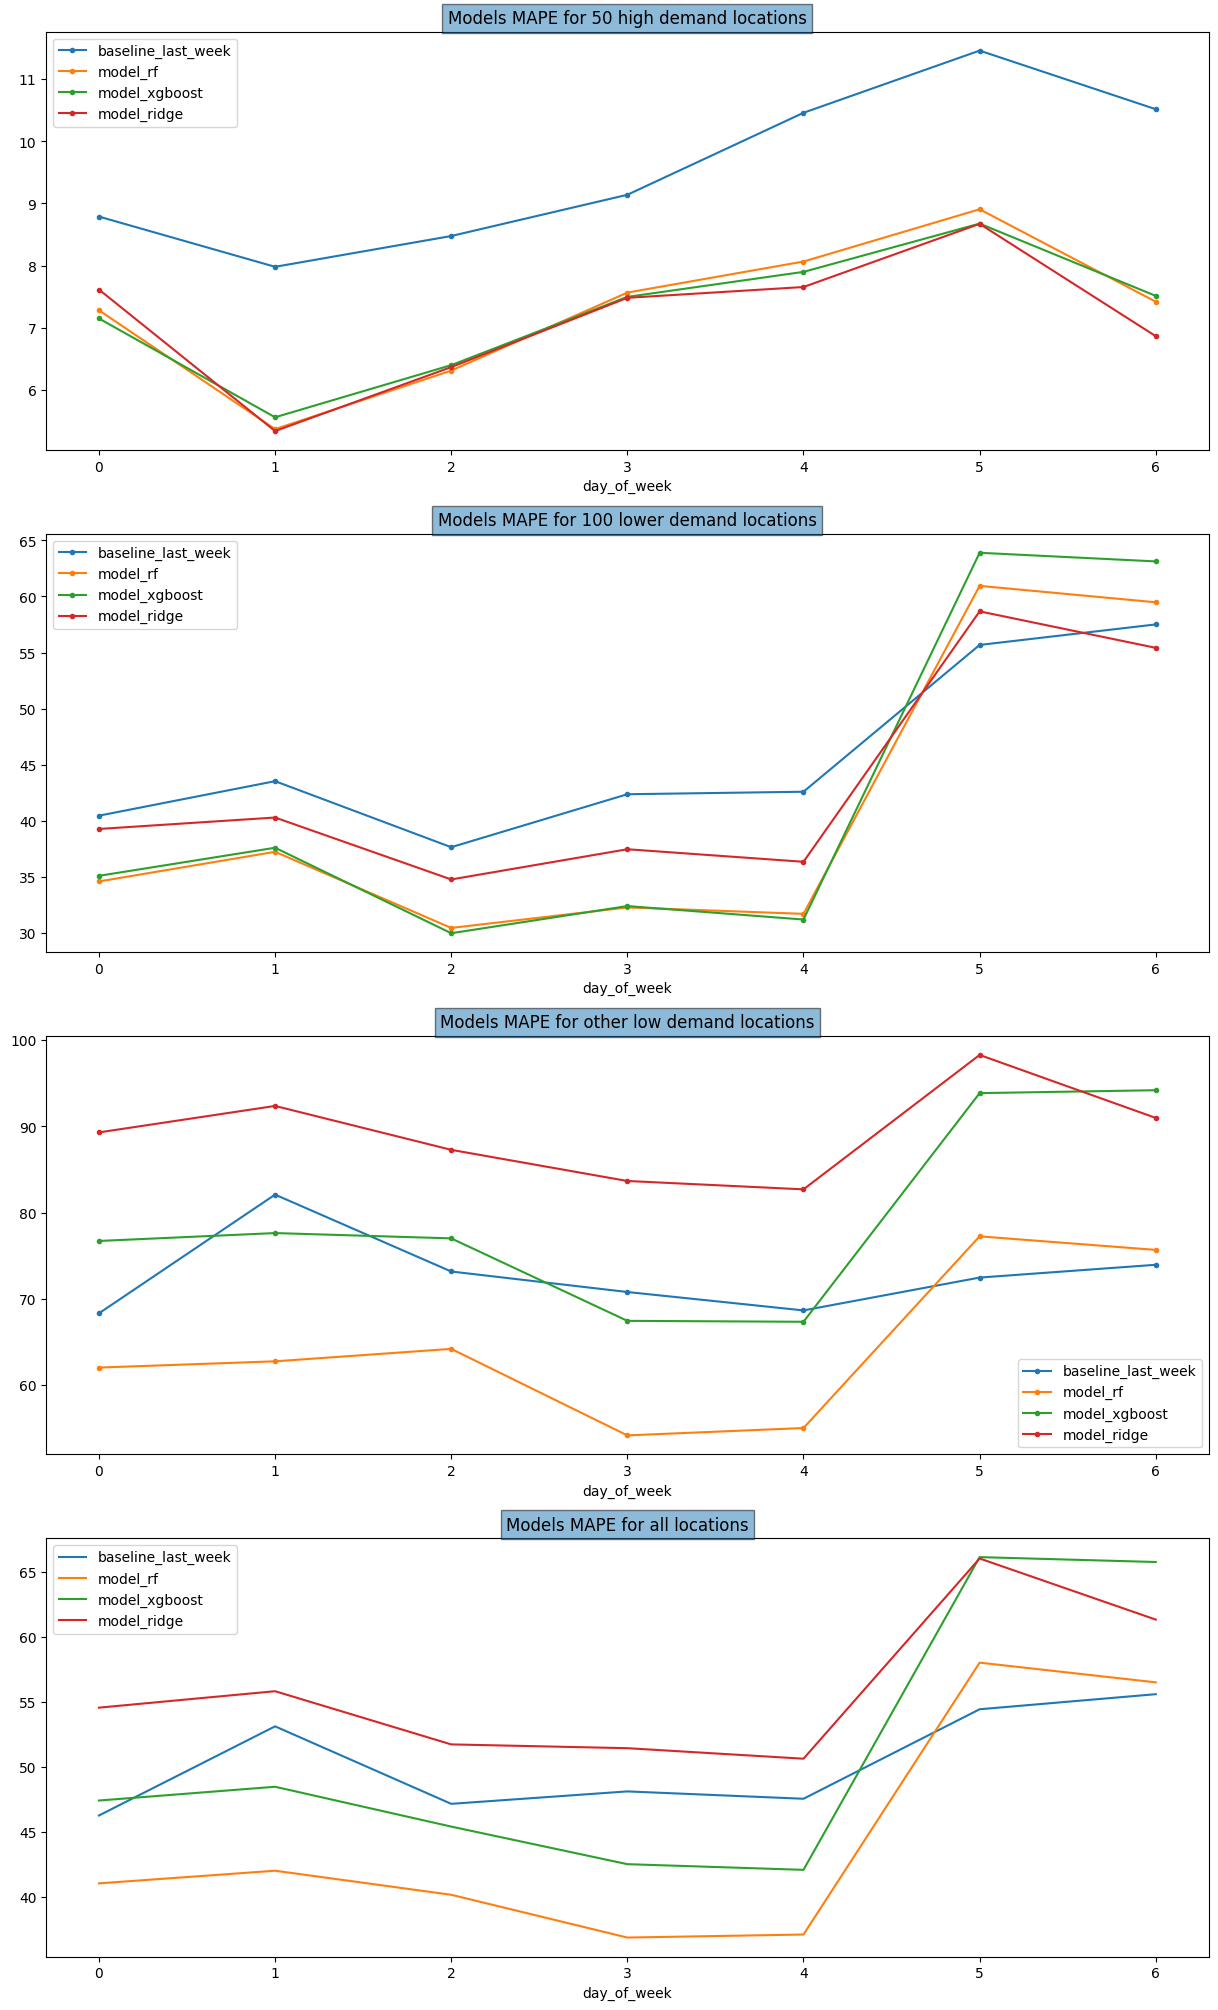

In [81]:
plot_mape(predictions_mean_error_dict, 'day_of_week')

### Plot MAE

In [82]:
def plot_mae(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):

            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mae',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


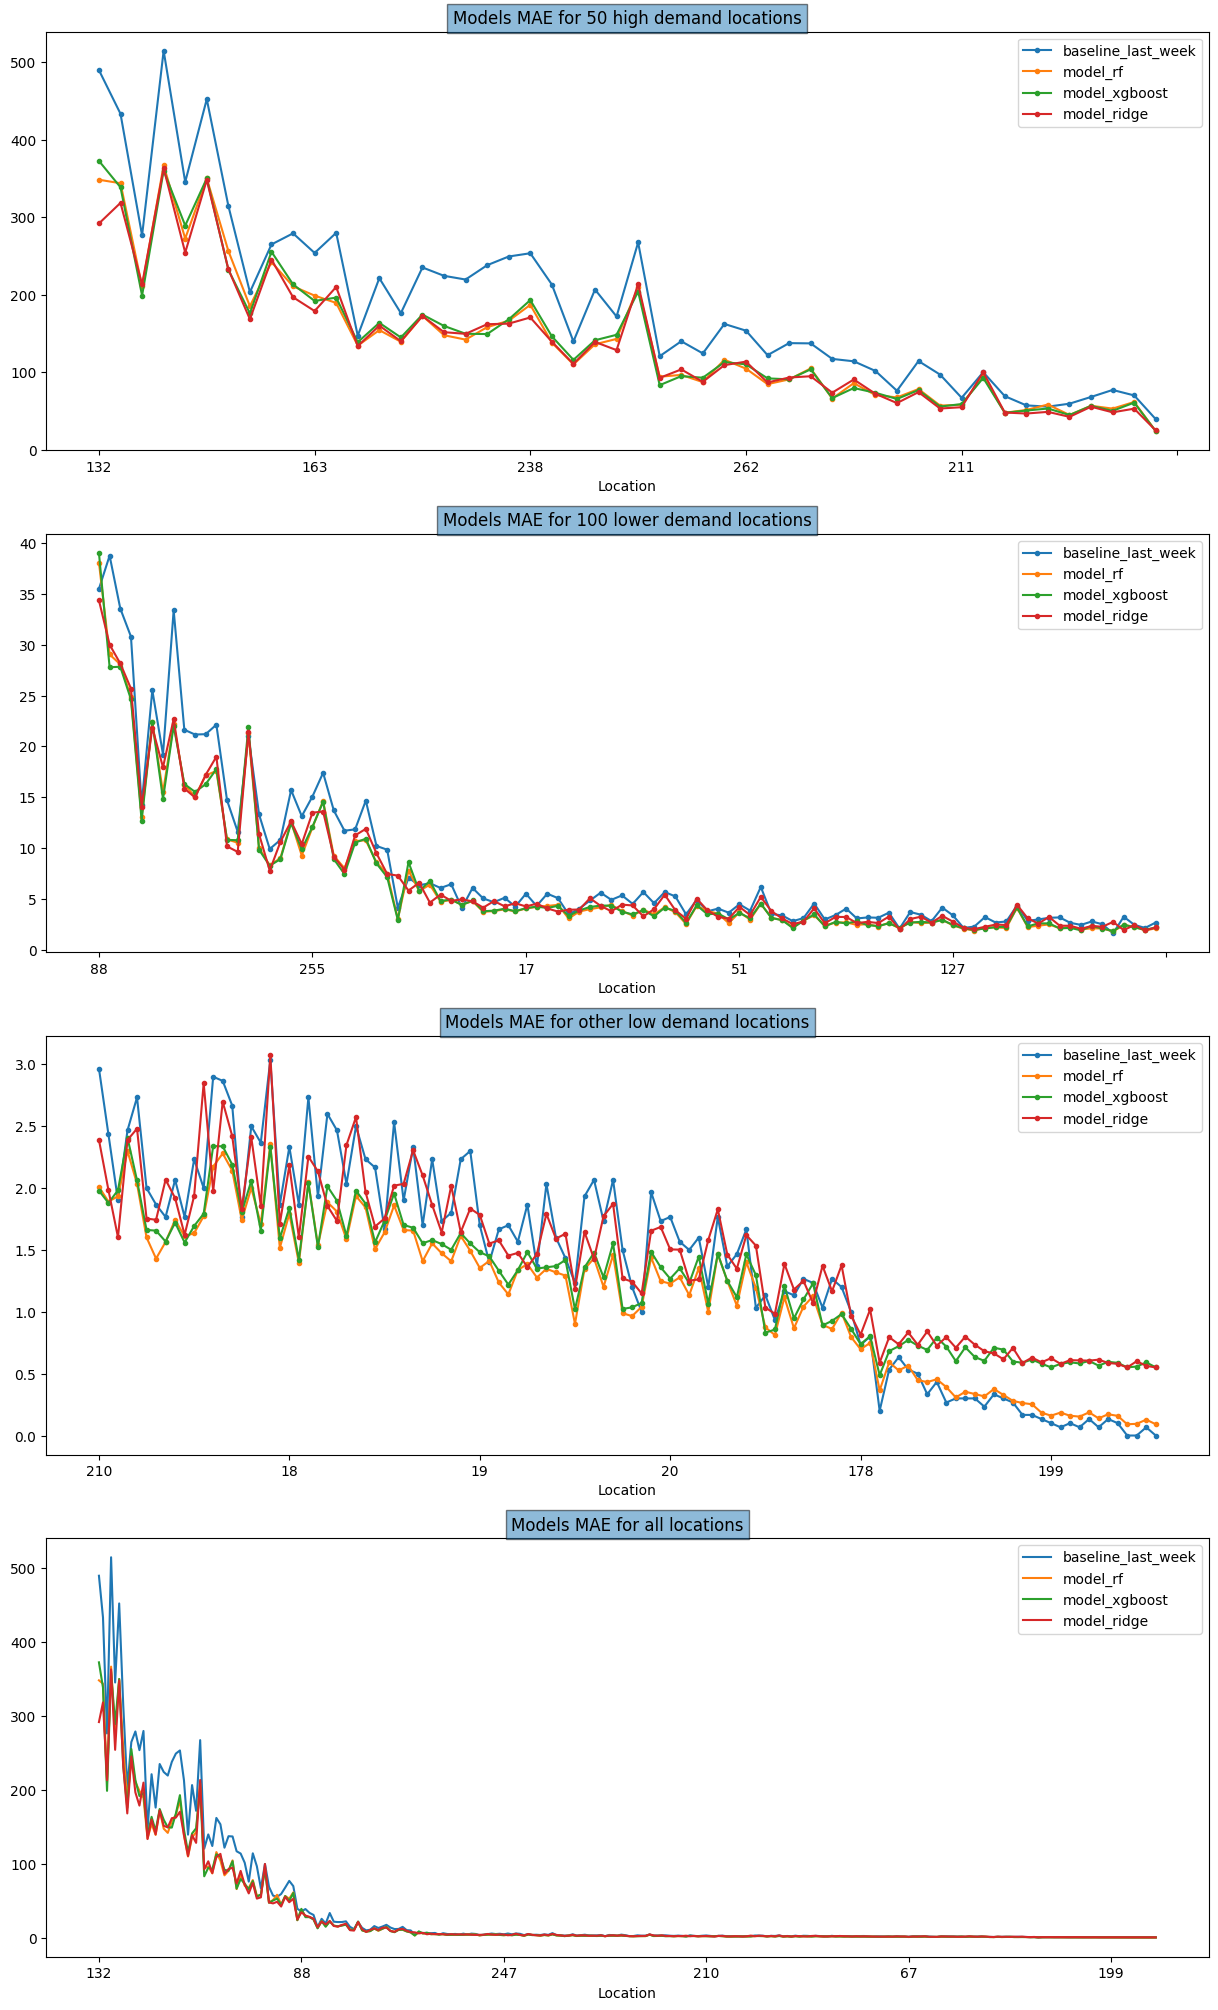

In [83]:
plot_mae(predictions_mean_error_dict, 'Location')

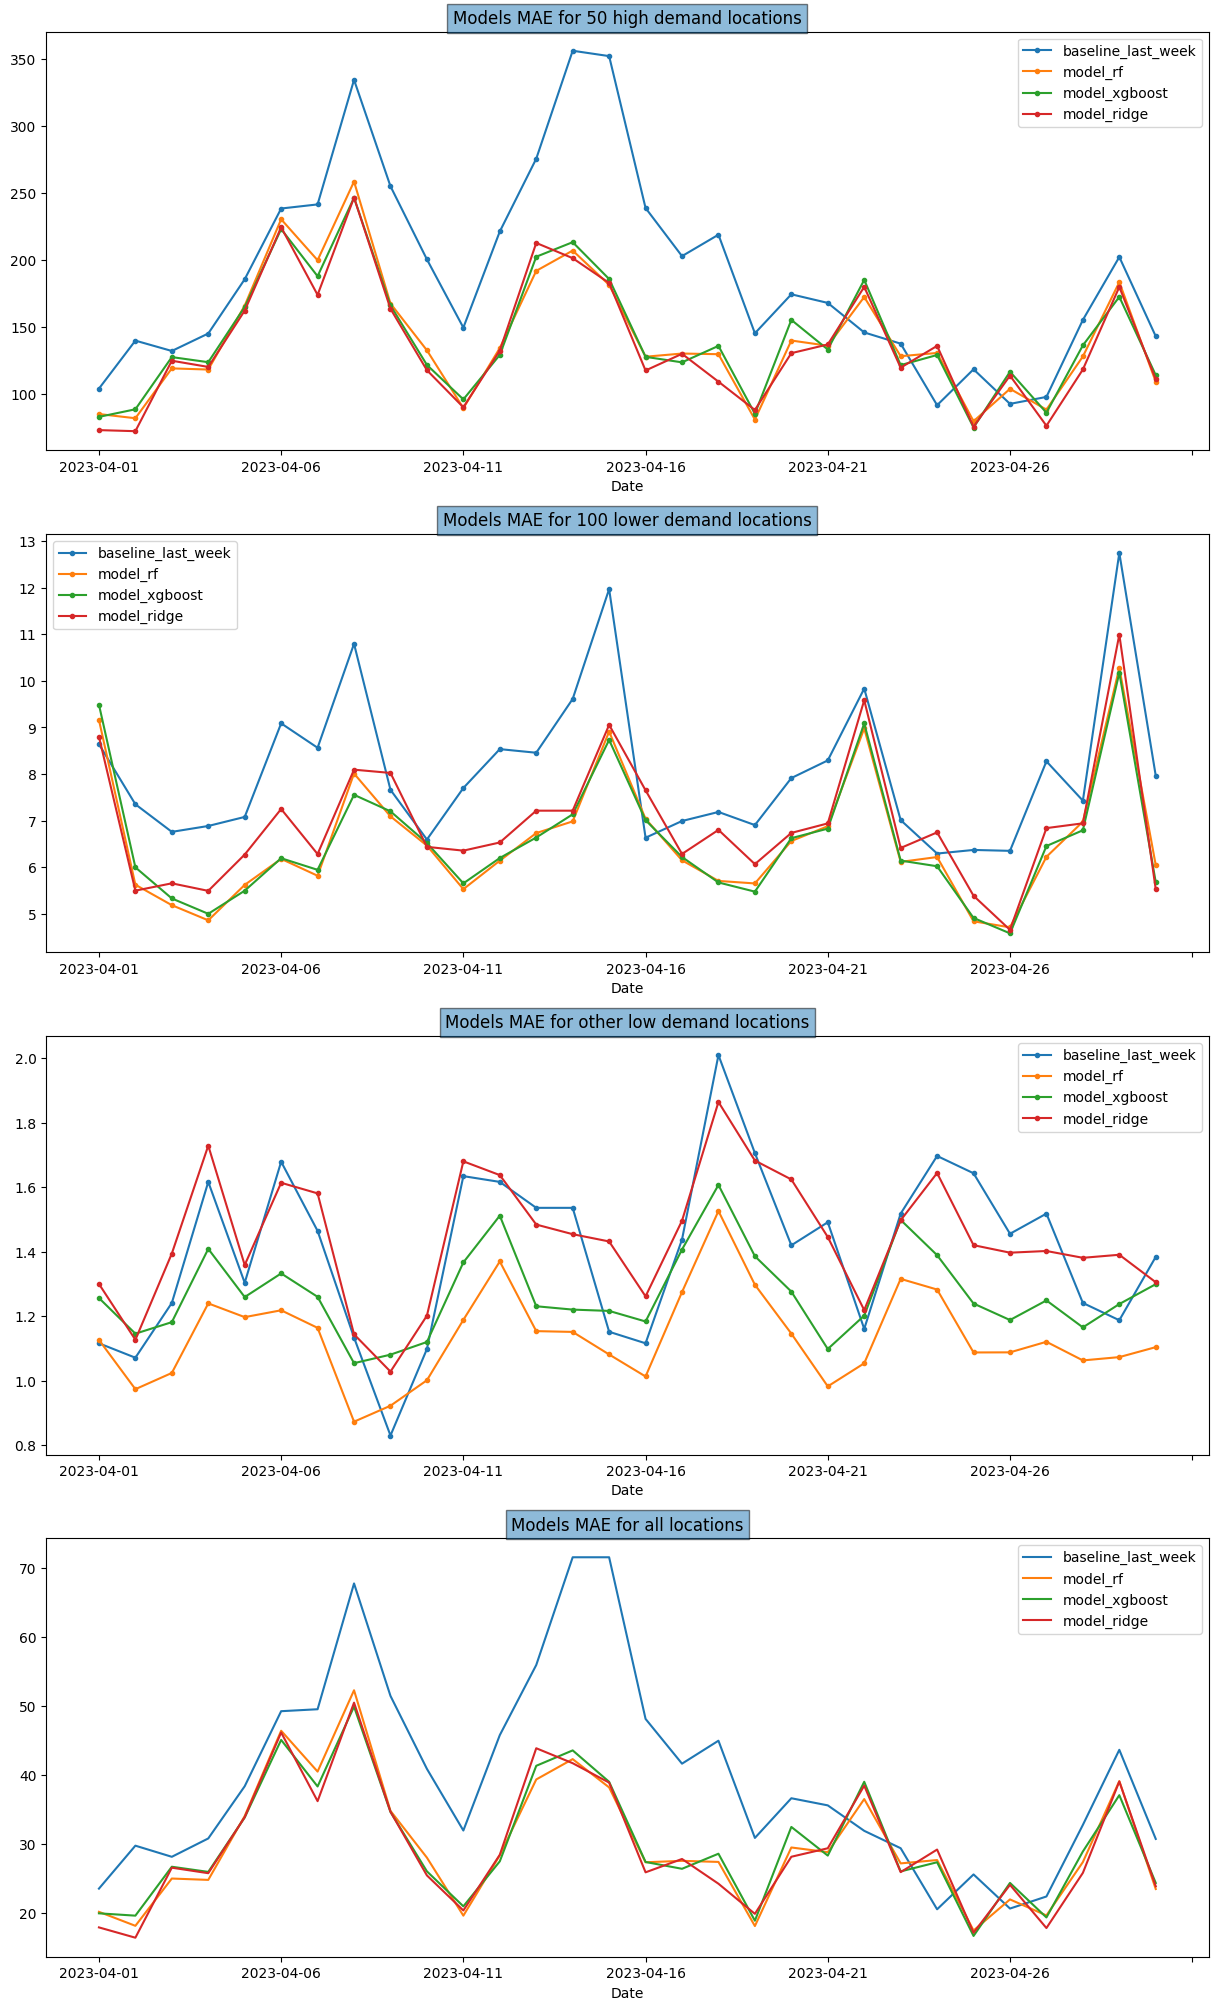

In [84]:
plot_mae(predictions_mean_error_dict, 'Date')

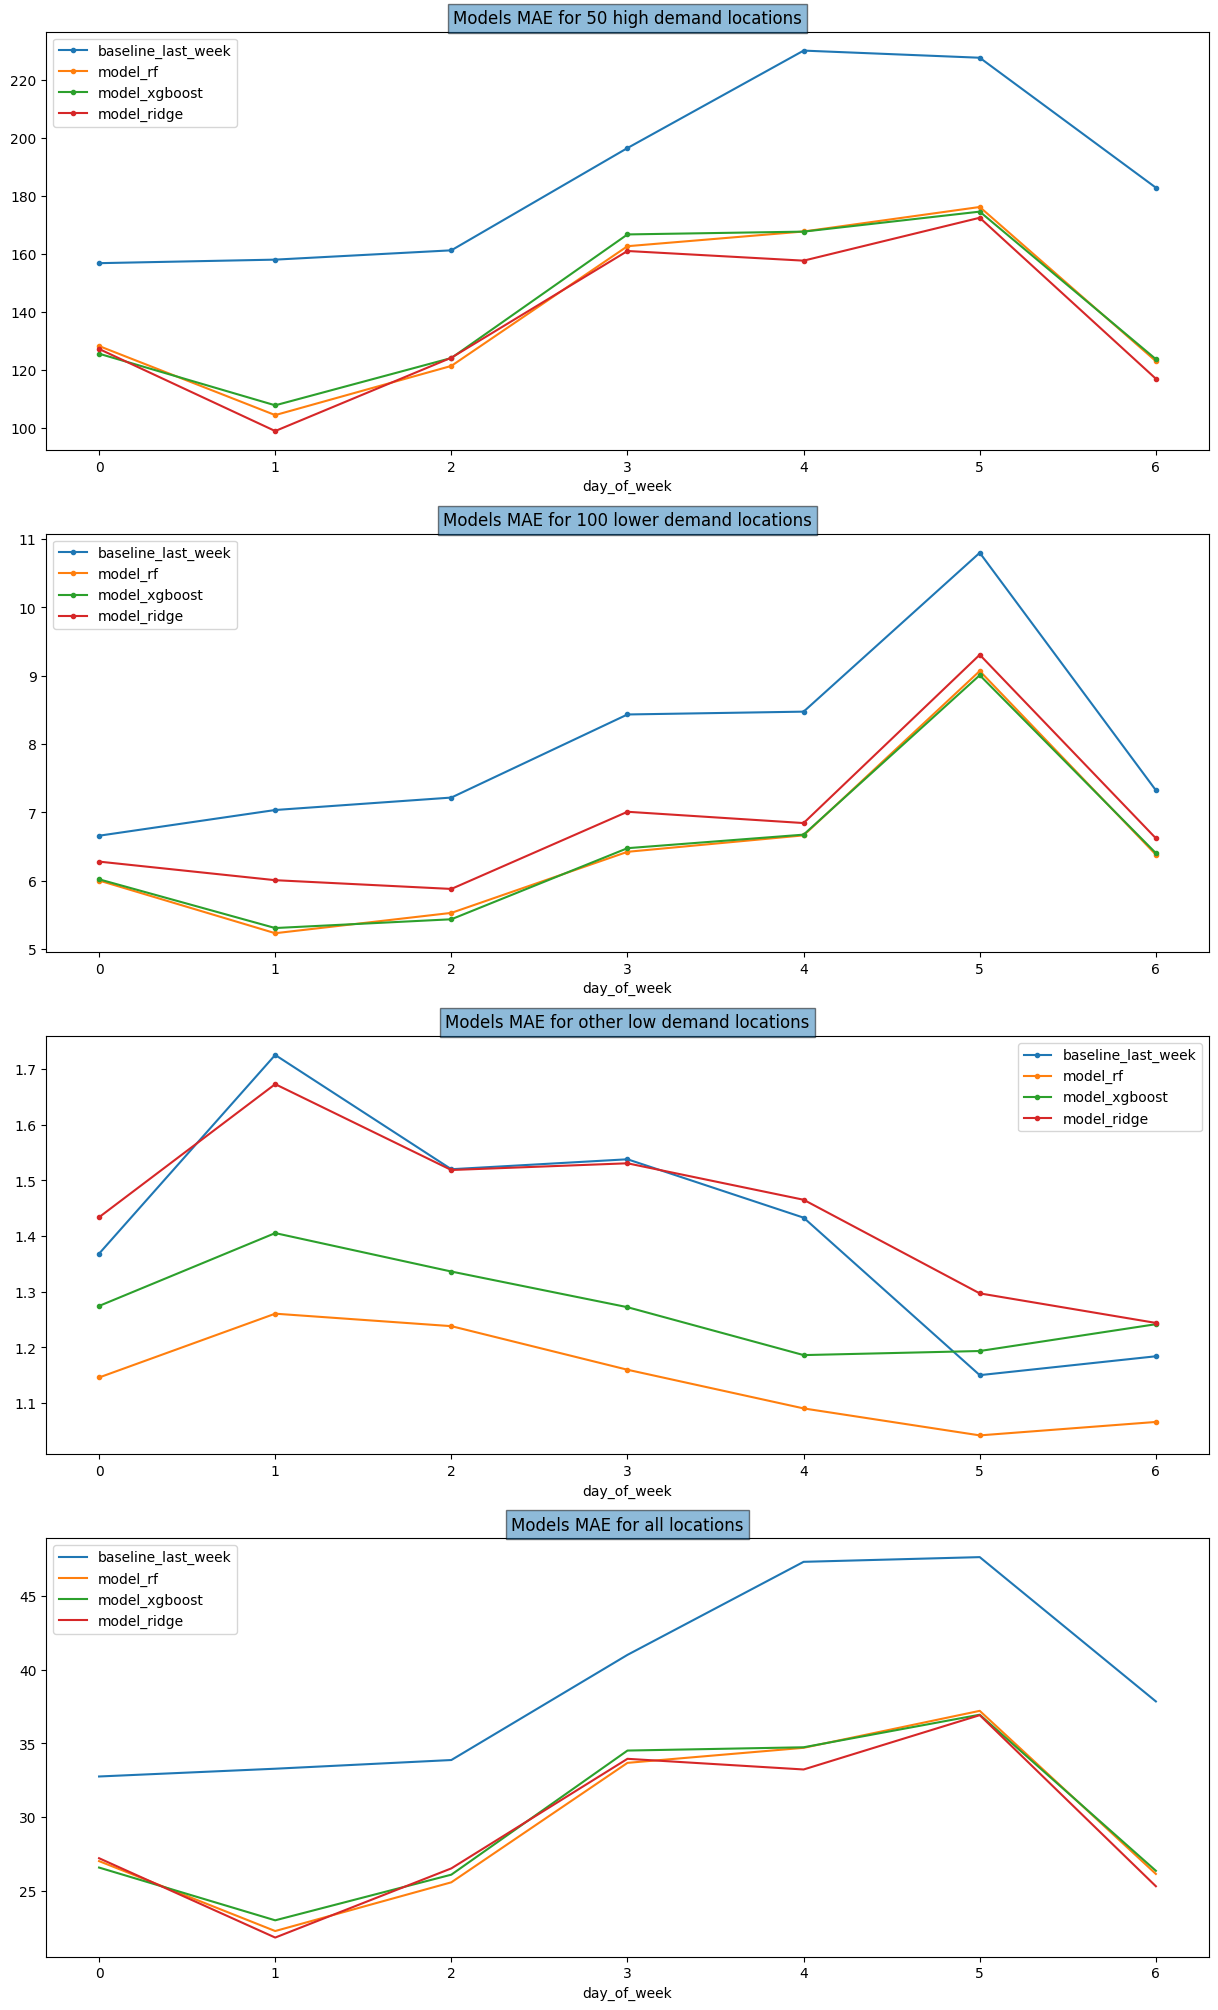

In [85]:
plot_mae(predictions_mean_error_dict, 'day_of_week')

### plot RMSE

In [86]:
def plot_rmse(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df['rmse'] = np.sqrt(high_demand_df['mse'])
            mid_demand_df['rmse'] = np.sqrt(mid_demand_df['mse'])
            low_demand_df['rmse'] = np.sqrt(low_demand_df['mse'])
            all_df['rmse'] = np.sqrt(all_df['mse'])

            high_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='rmse',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models RMSE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models RMSE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models RMSE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models RMSE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


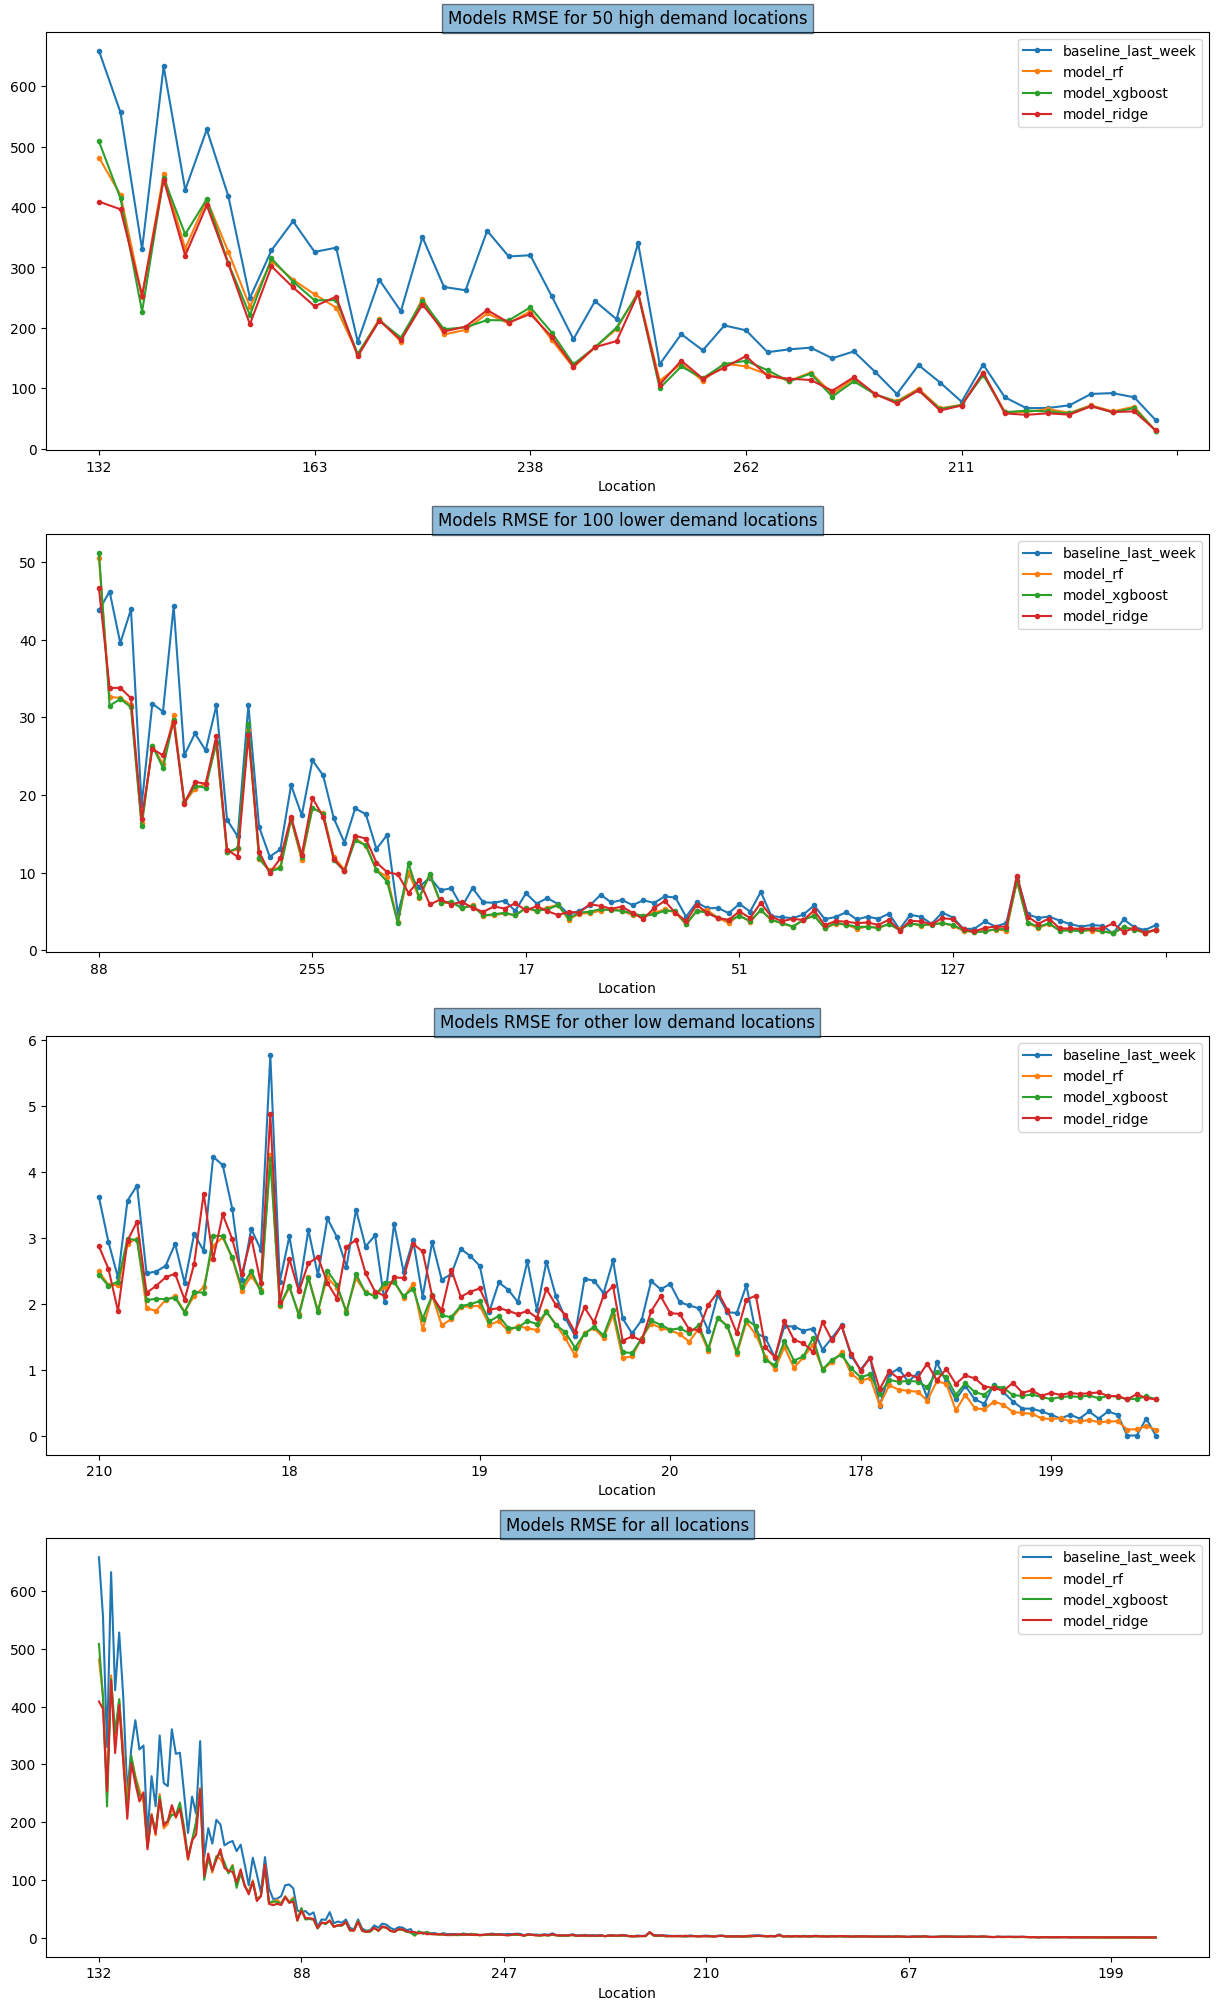

In [87]:
plot_rmse(predictions_mean_error_dict, 'Location')

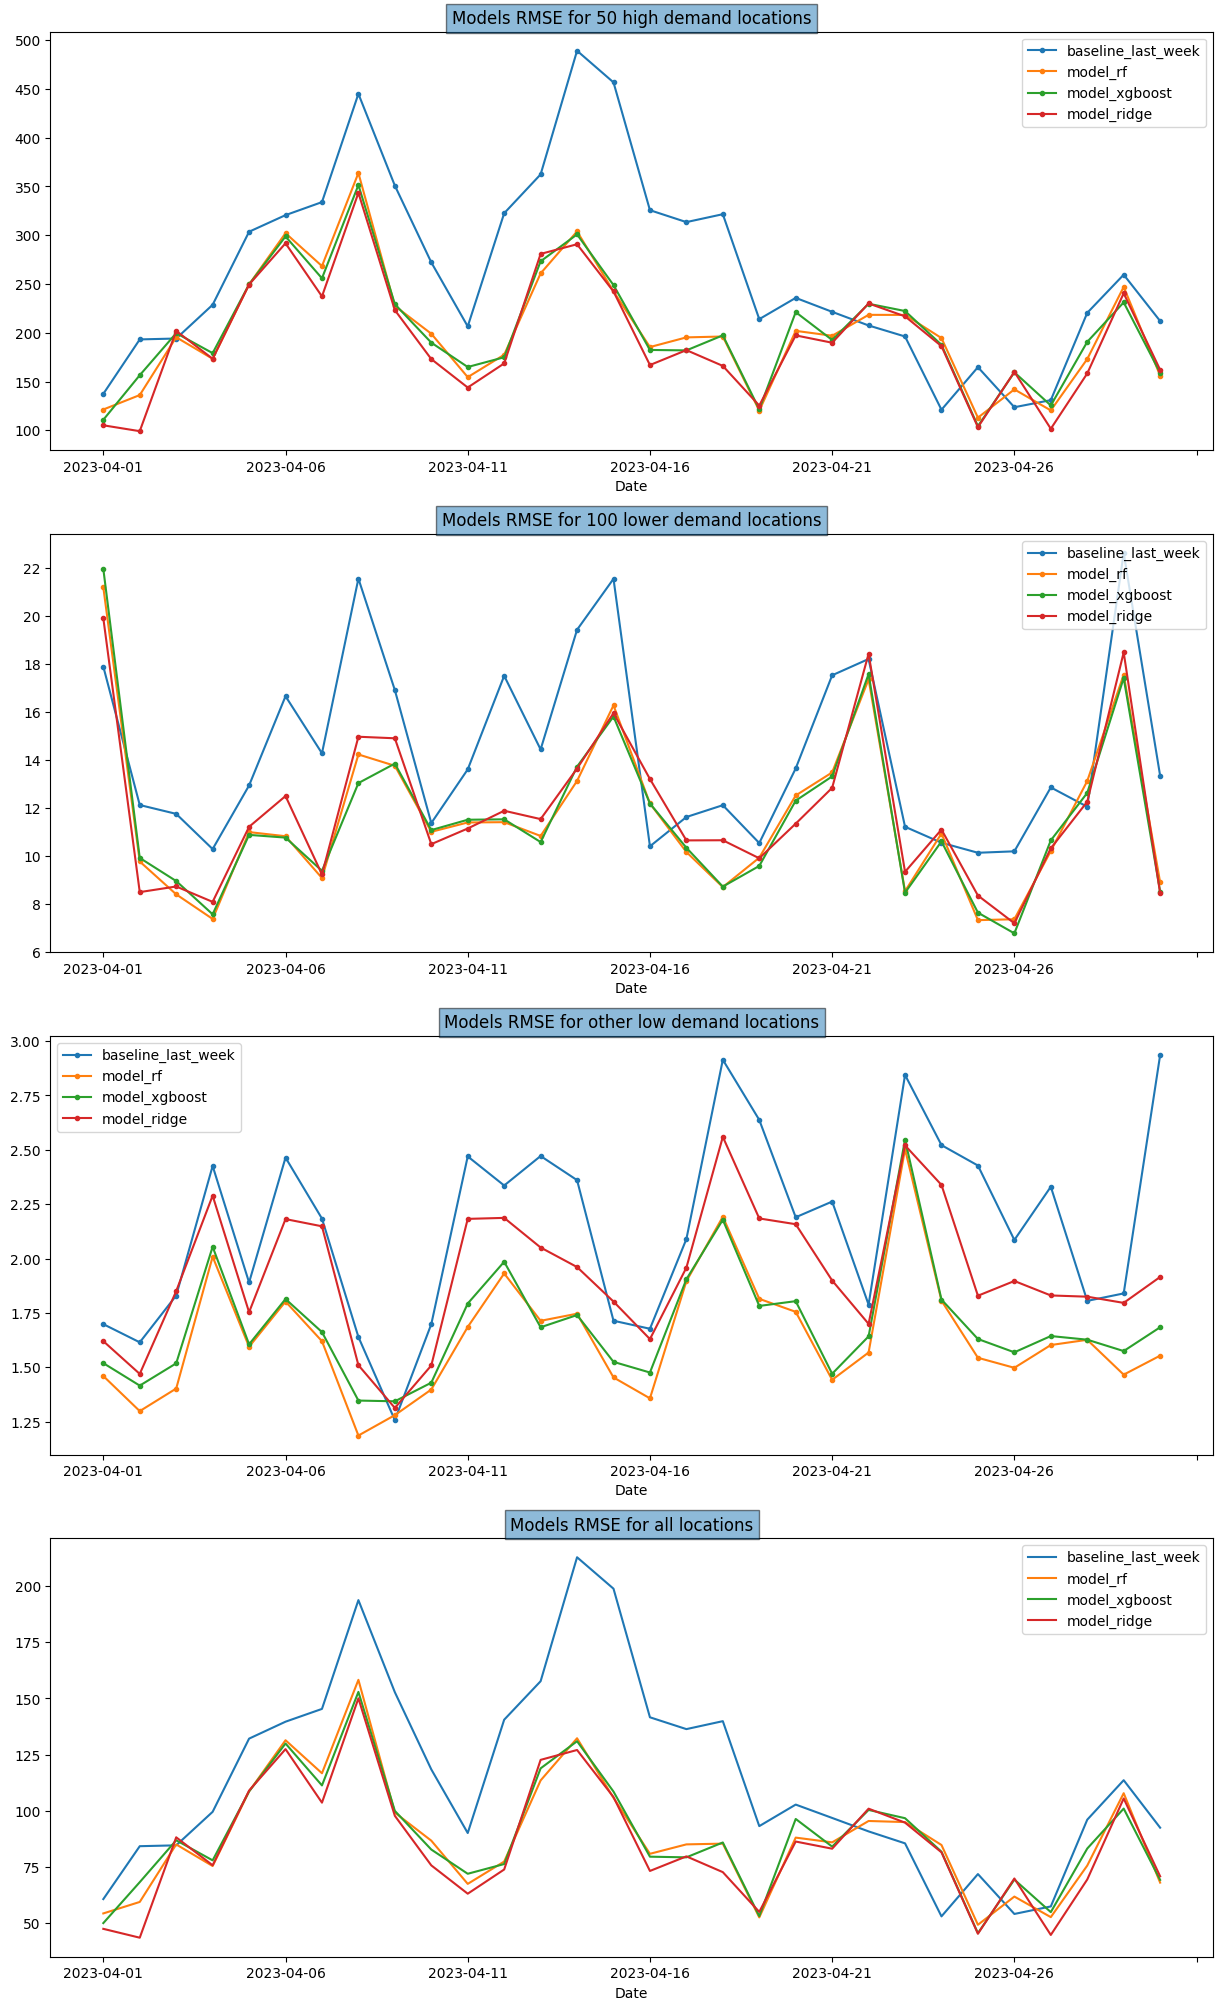

In [88]:
plot_rmse(predictions_mean_error_dict, 'Date')

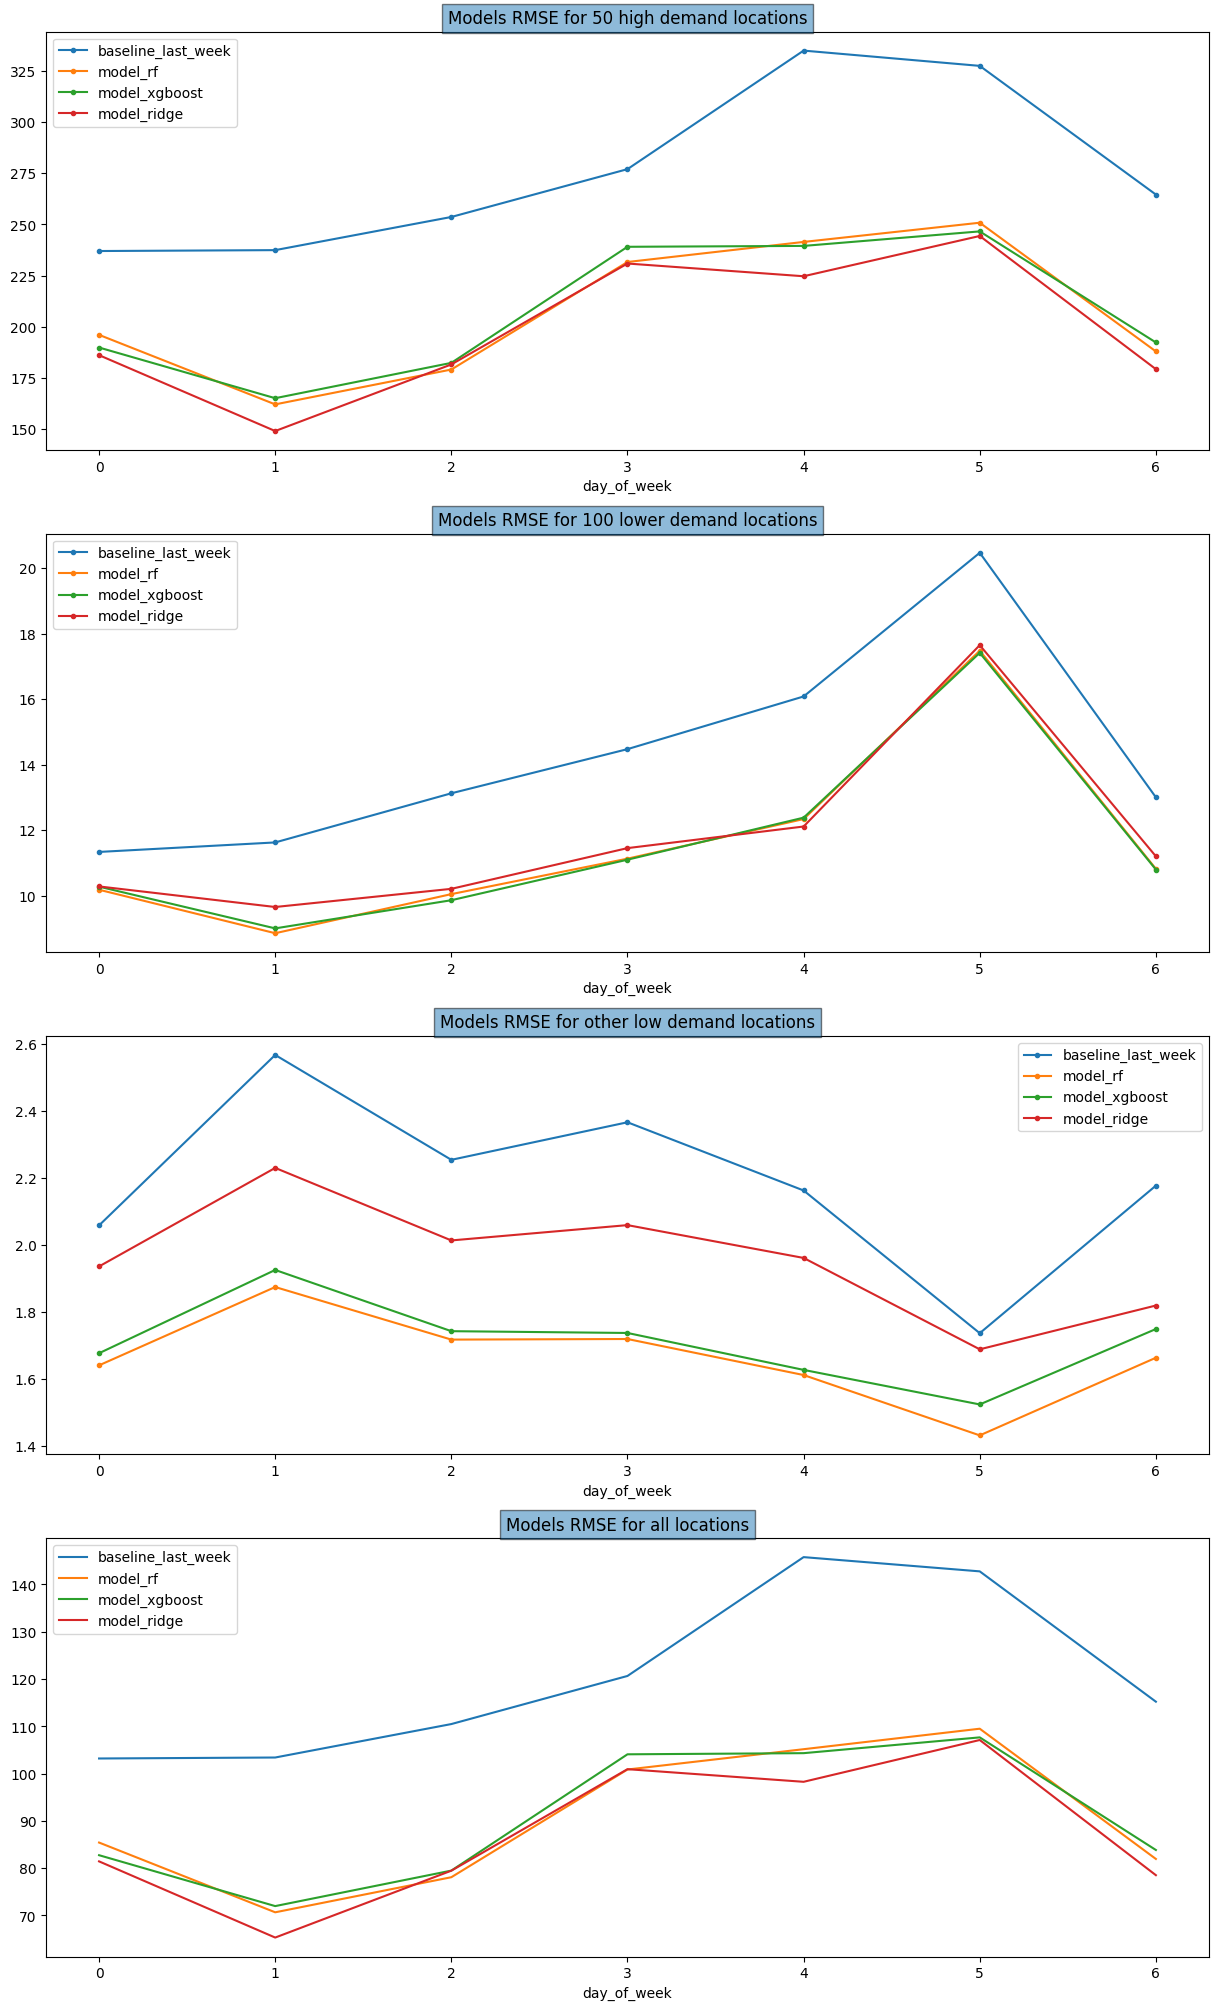

In [89]:
plot_rmse(predictions_mean_error_dict, 'day_of_week')

# Table of Results

In [90]:
def create_table_errors(predictions_dict, report_dict):
    for model, error_df in predictions_dict.items():
        if error_df is not None:
            report_dict['all_locations']['MAE'][model] = error_df['error'].mean()            
            report_dict['all_locations']['RMSE'][model] = np.sqrt(error_df['squared_error'].mean())
            report_dict['all_locations']['MAPE'][model] = error_df['percentage_error'].mean()

            error_high_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][:HIGH_DEMAND_NUMS]['Location'])]
            error_mid_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS]['Location'])]
            error_low_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:]['Location'])]

            report_dict['high_demand_locations']['MAE'][model] = error_high_demand_df['error'].mean()            
            report_dict['high_demand_locations']['RMSE'][model] = np.sqrt(error_high_demand_df['squared_error'].mean())
            report_dict['high_demand_locations']['MAPE'][model] = error_high_demand_df['percentage_error'].mean()
            
            report_dict['mid_demand_locations']['MAE'][model] = error_mid_demand_df['error'].mean()            
            report_dict['mid_demand_locations']['RMSE'][model] = np.sqrt(error_mid_demand_df['squared_error'].mean())
            report_dict['mid_demand_locations']['MAPE'][model] = error_mid_demand_df['percentage_error'].mean()
            
            report_dict['low_demand_locations']['MAE'][model] = error_low_demand_df['error'].mean()            
            report_dict['low_demand_locations']['RMSE'][model] = np.sqrt(error_low_demand_df['squared_error'].mean())
            report_dict['low_demand_locations']['MAPE'][model] = error_low_demand_df['percentage_error'].mean()
    return report_dict

In [91]:
report_dict = create_table_errors(predictions_dict, report_dict)
report_df = pd.DataFrame.from_dict({(i,j): report_dict[i][j] 
                            for i in report_dict.keys() 
                            for j in report_dict[i].keys()},
                            orient='index')

report_df.index = pd.MultiIndex.from_tuples(report_df.index)
report_df = report_df.T

In [92]:
df = pd.DataFrame(report_df,
                  index=pd.Index(report_df.index),
                  columns=pd.MultiIndex.from_product([['high_demand_locations', 'mid_demand_locations', 'low_demand_locations', 'all_locations'],
                                                      ['MAPE','MAE','RMSE']], names=['location category:', 'Error Metrics:']))


In [93]:
df

location category: high_demand_locations                          \
Error Metrics:                      MAPE         MAE        RMSE   
baseline_last_week              9.642141  188.829333  279.780497   
model_rf                        7.334958  141.117606  210.245556   
model_xgboost                   7.300255  141.962760  210.810996   
model_ridge                     7.185505  137.432524  202.797421   

location category: mid_demand_locations                       \
Error Metrics:                     MAPE       MAE       RMSE   
baseline_last_week            46.408908  8.061812  14.781067   
model_rf                      42.238231  6.554366  12.039559   
model_xgboost                 43.338200  6.556394  12.027268   
model_ridge                   44.100256  6.923156  12.258111   

location category: low_demand_locations                     all_locations  \
Error Metrics:                     MAPE       MAE      RMSE          MAPE   
baseline_last_week            72.808051  1.400298  2.187560     50.629156   
model_rf                      65.251578  1.137190  1.663054     45.379104   
model_xgboost                 80.155299  1.269036  1.711247     52.099022   
model_ridge                   89.572999  1.439661  1.951963     56.447061   

location category:                         
Error Metrics:            MAE        RMSE  
baseline_last_week  39.353459  121.886055  
model_rf            29.654133   91.639149  
model_xgboost       29.870108   91.883669  
model_ridge         29.399646   88.758716

In [94]:
df.style.format('{:.2f}')